# Case Study - CA Housing Price
Let's create a comprehensive tutorial that includes Linear Regression, Polynomial Regression, Polynomial Regression with Regularization,Multivariable Regression (using multiple features), and Ensemble Methods using the California Housing Prices dataset. We will explore three popular ensemble techniques: Bagging, Boosting, and Stacking. For this tutorial, we'll use the Gradient Boosting Regressor, Random Forest Regressor, and a simple Linear Regression as base models.

This comprehensive tutorial covers various regression techniques, including Linear Regression, Polynomial Regression, Polynomial Regression with Regularization (Ridge, Lasso, ElasticNet), Multivariable Regression, and Random Forest Regression using Ensemble Methods. Users will be able to understand the strengths and weaknesses of each method and how to select appropriate models for different regression tasks. They can further explore other real-world datasets and apply these regression models to make accurate predictions.

## Import Libraries
We'll start by importing the necessary libraries for data manipulation, visualization, and regression analysis.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Load and Prepare the Dataset
Next, we'll load the California Housing Prices dataset and prepare it for regression analysis.

In [5]:
# Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression (Baseline)
Let's start with a simple linear regression model as a baseline.

In [6]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_linear = linear_model.predict(X_train_scaled)
y_test_pred_linear = linear_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
linear_r2_train = r2_score(y_train, y_train_pred_linear)
linear_r2_test = r2_score(y_test, y_test_pred_linear)
linear_mse_train = mean_squared_error(y_train, y_train_pred_linear)
linear_mse_test = mean_squared_error(y_test, y_test_pred_linear)

print(f"Linear Regression (Baseline):")
print(f"Training R-squared: {linear_r2_train:.4f}, Training MSE: {linear_mse_train:.4f}")
print(f"Testing R-squared: {linear_r2_test:.4f}, Testing MSE: {linear_mse_test:.4f}")

Linear Regression (Baseline):
Training R-squared: 0.6126, Training MSE: 0.5179
Testing R-squared: 0.5758, Testing MSE: 0.5559


## Polynomial Regression
Next, let's perform Polynomial Regression with different degrees.

In [7]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Regression:
Best Degree: 2
Training R-squared Scores: [0.6852681982344955, 0.7441415681335484, 0.7893228446487628]
Testing R-squared Scores: [0.6456819729261878, -18.38870805843526, -11476.104183339065]


## Polynomial Regression with Regularization
Now, let's perform Polynomial Regression with Regularization using Ridge, Lasso, and ElasticNet.

In [8]:
# Continue with degree of 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 50]

# Create and fit the Ridge, Lasso, and ElasticNet regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

    for l1_ratio in [0.2, 0.5, 0.7, 0.9]:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)

# Find the best alpha and l1_ratio based on the testing R-squared score
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]
best_alpha_elasticnet = alphas[np.argmax(elasticnet_r2_test_scores)]
best_l1_ratio_elasticnet = [0.2, 0.5, 0.7, 0.9][np.argmax(elasticnet_r2_test_scores) % 4]

print(f"\nPolynomial Regression with Regularization:")
print(f"Best Alpha (Ridge): {best_alpha_ridge:.4f}")
print(f"Best Alpha (Lasso): {best_alpha_lasso:.4f}")
print(f"Best Alpha (ElasticNet): {best_alpha_elasticnet:.4f}")
print(f"Best l1_ratio (ElasticNet): {best_l1_ratio_elasticnet:.1f}")
print(f"Ridge Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Ridge Testing R-squared Scores: {ridge_r2_test_scores}")
print(f"Lasso Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Lasso Testing R-squared Scores: {lasso_r2_test_scores}")
print(f"ElasticNet Training R-squared Scores: {elasticnet_r2_train_scores}")
print(f"ElasticNet Testing R-squared Scores: {elasticnet_r2_test_scores}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.393e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+03, tolerance: 2.207e


Polynomial Regression with Regularization:
Best Alpha (Ridge): 50.0000
Best Alpha (Lasso): 0.0010
Best Alpha (ElasticNet): 1.0000
Best l1_ratio (ElasticNet): 0.9
Ridge Training R-squared Scores: [0.6852681982309979, 0.6852681978848241, 0.6852681633541837, 0.685264794671512, 0.6849940748677977, 0.6816443257072609]
Ridge Testing R-squared Scores: [0.645683225805578, 0.6456944994375847, 0.6458070098962285, 0.6469096540341595, 0.6558501677208112, 0.6672535561034868]
Lasso Training R-squared Scores: [0.6830030979089348, 0.6305732853769765, 0.500981674817156, 0.033220008724097694, 0.0, 0.0]
Lasso Testing R-squared Scores: [0.6686741743527673, 0.533056472931786, 0.4823562161721351, 0.032132551538488596, -0.00021908714592466794, -0.00021908714592466794]
ElasticNet Training R-squared Scores: [0.6840310978294589, 0.6837217689230024, 0.6834122448233106, 0.6831585830280078, 0.6641895730066483, 0.654089814353995, 0.6463124687609253, 0.6364839821265846, 0.5619051580675156, 0.5325527976563843, 0.510

## Multivariable Regression
Now, let's perform Multivariable Regression using all available features.

In [9]:
# Create and fit the multivariable regression model
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_multi = multi_model.predict(X_train_scaled)
y_test_pred_multi = multi_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
multi_r2_train = r2_score(y_train, y_train_pred_multi)
multi_r2_test = r2_score(y_test, y_test_pred_multi)
multi_mse_train = mean_squared_error(y_train, y_train_pred_multi)
multi_mse_test = mean_squared_error(y_test, y_test_pred_multi)

print(f"\nMultivariable Regression:")
print(f"Training R-squared: {multi_r2_train:.4f}, Training MSE: {multi_mse_train:.4f}")
print(f"Testing R-squared: {multi_r2_test:.4f}, Testing MSE: {multi_mse_test:.4f}")


Multivariable Regression:
Training R-squared: 0.6126, Training MSE: 0.5179
Testing R-squared: 0.5758, Testing MSE: 0.5559


## Ensemble Methods - Random Forest Regression
Finally, let's apply Ensemble Methods, specifically Random Forest Regression, to the dataset.

In [10]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate R-squared and mean squared error for evaluation
rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regression:")
print(f"Training R-squared: {rf_r2_train:.4f}, Training MSE: {rf_mse_train:.4f}")
print(f"Testing R-squared: {rf_r2_test:.4f}, Testing MSE: {rf_mse_test:.4f}")


Random Forest Regression:
Training R-squared: 0.9736, Training MSE: 0.0353
Testing R-squared: 0.8053, Testing MSE: 0.2552


## Visualization
You can visualize the R-squared scores for different models.

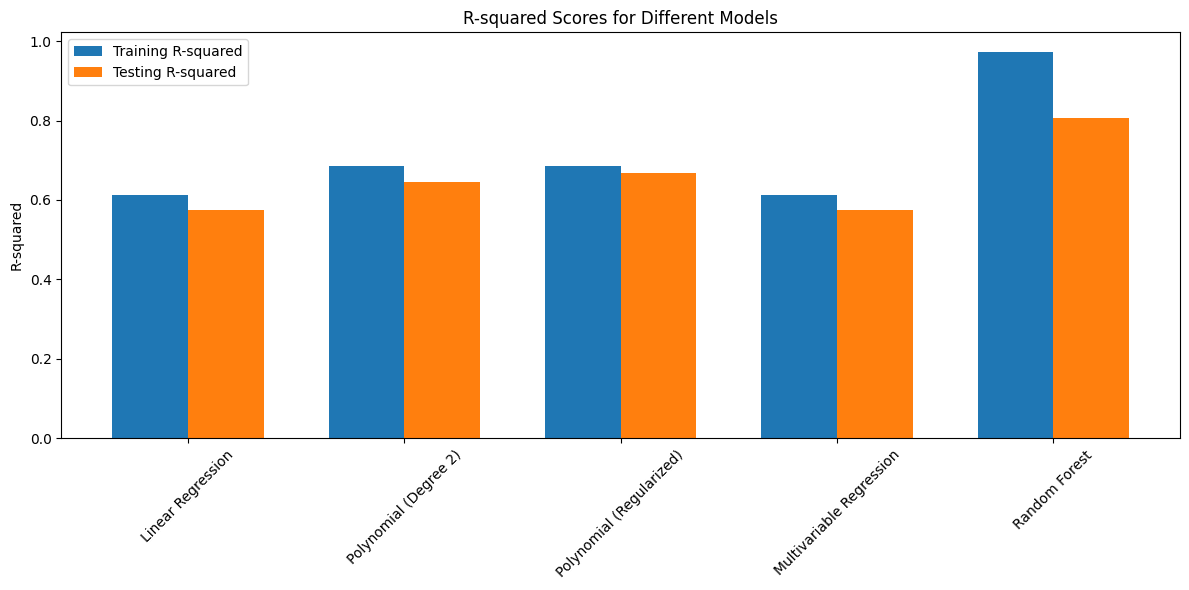

In [11]:
# Plotting R-squared scores for different models
plt.figure(figsize=(12, 6))

models = ['Linear Regression', f'Polynomial (Degree {best_degree})', 'Polynomial (Regularized)',
          'Multivariable Regression', 'Random Forest']

train_scores = [linear_r2_train, polynomial_r2_train_scores[np.argmax(polynomial_r2_test_scores)],
                max(ridge_r2_train_scores), multi_r2_train, rf_r2_train]

test_scores = [linear_r2_test, polynomial_r2_test_scores[np.argmax(polynomial_r2_test_scores)],
               max(ridge_r2_test_scores), multi_r2_test, rf_r2_test]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training R-squared')
plt.bar(x + width/2, test_scores, width, label='Testing R-squared')

plt.xticks(x, models, rotation=45)
plt.ylabel('R-squared')
plt.title('R-squared Scores for Different Models')
plt.legend()
plt.tight_layout()
plt.show()